![WordCloud](./img/wordcloud.png)

# Lernmodul zur Verarbeitung und Analyse von Textdaten

Die Verarbeitung von menschlicher Sprache (Natural Language Processing, NLP) gilt als Voraussetzung für eine erfolgreiche Mensch-Maschine-Kommunikation. Zusätzlich kann sie dabei helfen eine vom Mensch unternommene Textanalyse zu unterstützen. Handelt es sich bei diesem Kommentar um unerwünschte Inhalte, verbreitet dieser Beitrag Falschinformationen und welche Meinung will der Verfasser mit dieser Rezension zum Ausdruck bringen.

Im folgenden Lernmodul sollen mithilfe computergestützter Methoden eine Antwort auf solche Problemstellungen gefunden werden. Im Zuge der Sentiment Analysis wird versucht die Intention hinter einem Textbeitrag zu quantifizieren um bspw. zwischen einer positiven und einer negativen Aussage zu unterscheiden. Bevor aber ein Modell (hier: Klassifikator) eine Vorhersage (hier: Stimmung) über die verfügbaren Daten (hier: Textbeiträge) treffen kann, müssen diese vorbereitet werden. Das folgende Modul spielt diese Vorbereitung einmal mithilfe eines Jupyter Notebook, der Programmiersprache Python und unterstützenden Bibliotheken durch.

**Übersicht über die Lerninhalte:**

1. [Einführung](#einführung)
    1. [Motivation](#motivation)
    2. [Voraussetzungen](#voraussetzungen)
2. [Daten](#daten)
    1. [Textdaten beschaffen](#beschaffen)
    2. [Textdaten erkunden](#erkunden)
    3. [Textdaten aufbereiten](#aufbereiten)
        1. [Zeichen bereinigen](#zeichen-bereinigen)
        2. [Wörter bereinigen](#wörter-bereinigen)
        3. [Tweets bereinigen](#tweets-bereinigen)
3. [Modell](#modell)
    1. [Textdaten einbetten](#einbetten)
        1. [Vokabular](#vokabular)
        2. [Label](#label)
        3. [Vektorisierung](#vectorization)
        4. [Features](#features)
    2. [Textdaten klassifizieren](#klassifizieren)
        1. [Überwachte Klassifikation](#überwachte-klassifikation)
        2. [Unüberwachte Klassifikation](#unüberwachte-klassifikation)
4. [Verwendung](#verwendung)
5. [Abschluss](#abschluss)

**Lernziele:**

Die Teilnehmer lernen Textdaten in roher Form Schritt für Schritt in kontextbezogene Daten für eine Textanalyse zu transformieren. Dies geschieht in der Datendomäne. Daraufhin bewegen sich die Teilnehmer in der Modelldomäne, in der sie die Daten in das Modell einbetten und sie vom Modell klassifizieren lassen.

**Voraussetzungen:**

- [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas)

**Setup für die Aufgabenüberprüfung:**

In [1]:
from taskreview.learningModule import LearningModule
texte_lm = LearningModule('data/lernmodul_texte.db')

<div style="background-color: #150458; padding: 5px;"></div>

## 1. <a id='einführung'>Einführung</a>

### 1.1 <a id='motivation'>Motivation</a>

Die Verarbeitung menschlicher Sprache (Natural Language Processing, NLP) ist ein prominentes Forschungsfeld der Informatik mit ähnlichem Bekanntheitsgrad wie die Analyse visueller Daten (Computer Vision), welche bspw. das Erkennen von Bildern (Image Recognition) sowie ihre Manipulation (Image Augmentation) betrachtet. Im ersten Fall wollen wir einen bekannten bzw. alten Bildinhalt klassifizieren, während der zweite Fall einen unbekannten bzw. neuen Bildinhalt erzeugt.

Wechseln wir von der Bild- auf die Textebene, lässt sich das Forschungsfeld des _NLP_ auf ähnliche Problemstellungen herunterbrechen, die in der folgenden Auflistung aufgeführt sind:

* Texterkennung (Text Recognition)
  * Spracherkennung (Speech Recognition)
  * Stimmungsanalyse (Sentiment Analysis)
* Textmanipulation (Text Augmentation)
  * Maschinelle Übersetzung (Machine Translation)
  * Automatisches Antworten (Question Answering)

Dieses Lernmodul beschäftigt sich mit der ersten Problemstellung, also der Texterkennung, im besonderen mit der Unterscheidung zwischen verschiedenen Stimmungen, welche der Verfasser eines Textes gehabt haben könnte. Ein aktuelles Anwendungsbeispiel ist die Identifikation von Hassreden, wie sie bspw. von [Facebook](https://www.facebook.com/) im Zuge ihrer [Community Standards](https://www.facebook.com/communitystandards/hate_speech) verboten sind und erkannt werden müssen. Aber auch ein aktuelles Stimmungsbild der Gesellschaft kann in Krisenzeiten über kürzlich verfasste Beiträge auf Twitter geschaffen werden.

### 1.2 <a id='voraussetzungen'>Voraussetzungen</a>

Dieses Lernmodul nimmt sich [NumPy](https://numpy.org/) für numerische Berechnungen, [Pandas](https://pandas.pydata.org/) zur Datenverarbeitung und [PyPlot](https://matplotlib.org/api/pyplot_api.html) zur Datenvisualisierung zur Hilfe. Die folgende Zelle importiert benötigte Abhängigkeiten:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Außerdem werden die folgenden Systemkomponenten zur Hife genommen:

In [3]:
import glob

<div style="background-color: #150458; padding: 5px;"></div>

## 2. <a id='daten'>Daten</a>

In der Datendomäne beschaffen wir uns zunächst einen Datensatz, welcher aus vielen Beispielen besteht, der die Grundgesamtheit an Daten bildet. Ein Beispiel umfasst dabei mindestens ein, wenn nicht sogar mehrere Merkmale. Ein Merkmal wird dabei durch einen numerischen oder symbolischen Wert verkörpert, der in unserem Fall bspw. ein Text sein kann. Im weiteren Verlauf werden die beschafften Daten begutachtet und auf Basis dessen bereinigt.

### 2.1 <a id='beschaffen'>Textdaten beschaffen</a>

twitter = pd.DataFrame()Wo findet man in der heutigen Zeit aktuelle Daten, welche eine eigene Meinung enthalten? Auf dem Kurznachrichtendienst Twitter. Und genau von dort stammt das ZIP-Archiv `tweets.json.zip`, welches wir im folgenden mithilfe von Pandas einlesen und im DataFrame `twitter` hinterlegen.

In [4]:
twitter = None # Fresh start

In [5]:
for file in glob.glob('./data/tweets/*.gz'):
    json = pd.read_json(file, compression='gzip')
    twitter = pd.concat([twitter, json[:5000]])

### 2.2 <a id='erkunden'>Textdaten erkunden</a>

Wie im [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas) kennengelernt, lässt sich über die `head()` Funktionalität der Kopf des Datensatzes betrachten. Wie schaut dieser aus?

In [6]:
twitter.head()

,twista,type,id,user,created_at,recorded_at,source,retweets,favourites,lang,...,name,screen_name,location,description,url,verified,followers,friends,listed,statuses
0,0.3.4b1,reply,1245112617968033792,3.792278e+09,2020-03-31 22:15:55+00:00,2020-03-31 22:16:09.670982+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.3.4b1,reply,1245112620740296704,1.181766e+18,2020-03-31 22:15:56+00:00,2020-03-31 22:16:09.673858+00:00,"<a href=""http://twitter.com/download/android"" ...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3.4b1,reply,1245112625412923392,1.189159e+18,2020-03-31 22:15:57+00:00,2020-03-31 22:16:09.684859+00:00,"<a href=""http://twitter.com/download/android"" ...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3.4b1,reply,1245081023324528640,4.766604e+07,2020-03-31 20:10:23+00:00,2020-04-01 08:15:03.535422+00:00,"<a href=""http://twitter.com/download/iphone"" r...",7.0,65,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.3.4b1,reply,1245112639988076544,2.809609e+09,2020-03-31 22:16:01+00:00,2020-03-31 22:16:09.692649+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Leider liefert die `head()` Funktionalität nicht die Größe des Datensatzes zurück. Wie viele Beispiele sind in ihm enthalten?

In [7]:
texte_lm.show_task(1)

In [8]:
twitter.shape[0]

10000

Wie viele Werte liegen pro Beispiel vor? Aus wie vielen Merkmalen besteht der Datensatz?

In [9]:
texte_lm.show_task(2)

In [10]:
twitter.shape[1]

26

Mal sehen, wie die Merkmale heißen.

In [11]:
twitter.columns

Index(['twista', 'type', 'id', 'user', 'created_at', 'recorded_at', 'source',
       'retweets', 'favourites', 'lang', 'hashtags', 'urls', 'mentions',
       'mentioned_ids', 'text', 'refers_to', 'name', 'screen_name', 'location',
       'description', 'url', 'verified', 'followers', 'friends', 'listed',
       'statuses'],
      dtype='object')

Das Merkmal _lang_ schauen wir uns als Erstes an. Welche Sprachen sind vertreten?

In [12]:
twitter['lang'].unique()

array(['de', 'en', 'pt', 'es', 'tr', 'und', 'fr', 'tl', 'et', 'it', 'ko',
       'in'], dtype=object)

Wir behalten lediglich die deutschen Inhalte...

In [13]:
twitter = twitter.drop(twitter[twitter.lang != 'de'].index).reset_index(drop=True)

Das Merkmal _text_ scheint die gewünschten Tweets zu enthalten. Wir extrahieren dieses Merkmal vom DataFrame `twitter` in eine DataSeries `tweets`.

In [14]:
tweets = twitter['text']
tweets.head()

0    @artelle22 Diese Nächte, wo man bis um 2 Uhr m...
1                           @astefanibays abner e sthe
2                   @durstige_waemby War schön mit dir
3     niemand hat a ahnung, aber jeder weiß es besser.
4                          @xXskiller20Xx Z u  s p ä t
Name: text, dtype: object

Beim Extrahieren des Tweets werden ausnahmslos alle Beispiele überführt. Sind unsere Daten nun vollständig, oder gibt es womöglich inhaltslose Tweets ohne Textinhalt, die uns in der folgenden Aufbereitung Probleme bereiten?

In [15]:
texte_lm.show_task(3)

In [16]:
tweets.isna().unique()

array([False,  True])

Wenn ja, bitte bereinigen...

In [17]:
tweets = tweets.dropna()

In [18]:
tweets_copy = tweets

### 2.3 <a id='aufbereiten'>Textdaten aufbereiten</a>

#### 2.3.1 <a id='zeichen-bereinigen'>Zeichen bereinigen</a>

Schauen wir uns das erste Beispiel an. Mit welchem Befehl kommen wir zum ersten Tweet?

In [19]:
texte_lm.show_task(4)

In [20]:
tweets.iloc[0]

'@artelle22 Diese Nächte, wo man bis um 2 Uhr morgens im Bett liegt und über das Leben nachdenkt.'

Leider enthalten Tweets allerhand Sonderzeichen, Emojis und vielleicht sogar eine URL. 

Daher werden wir als nächstes alle Symbole entfernen, die weder dem Alphabet angehören, noch Ziffern sind. Welcher reguläre Ausdruck kommt dafür in Frage?

In [21]:
texte_lm.show_task(5)

In [22]:
expression = '[^a-zA-ZäöüßÄÖU\s]'
tweets = tweets.replace(regex={expression : ''})
tweets.iloc[0]

'artelle Diese Nächte wo man bis um  Uhr morgens im Bett liegt und über das Leben nachdenkt'

Die folgenden regulären Ausdrücke entfernen zusätzlich alle URLs und Zeilenumbrüche.

In [23]:
tweets = tweets.replace(regex={r'http\S+' : '', r'\n' :  ' '})
tweets.iloc[0]

'artelle Diese Nächte wo man bis um  Uhr morgens im Bett liegt und über das Leben nachdenkt'

#### 2.3.2 <a id='wörter-bereinigen'>Wörter bereinigen</a>

Da unsere Bereinigung im vorherigen Abschnitt nur noch einzelne Wörter und keine Symbole mehr übrig gelassen hat, werden wir jeden Tweet in seine Bestandteile zerlegen. Dafür zerteilen wir die Zeichenkette anhand des Leerzeichens und erhalten eine Liste von Wörtern pro Tweet. Dieser Schritt wird als Tokenisierung bezeichnet.

In [24]:
tweets = tweets.str.split()
tweets.iloc[0]

['artelle',
 'Diese',
 'Nächte',
 'wo',
 'man',
 'bis',
 'um',
 'Uhr',
 'morgens',
 'im',
 'Bett',
 'liegt',
 'und',
 'über',
 'das',
 'Leben',
 'nachdenkt']

Nun da wir die einzelnen Wörter getrennt haben, fassen wir alle Wörter aus jedem Tweet zu einer großen Sammlung zusammen.

In [25]:
def aggregate_words(tweets):
    """Aggregate words from tweets"""
    
    all_words = []
    for sentence in tweets:
        for word in sentence:
            all_words.append(word.lower())
    return all_words

Wie viele unterschiedliche Wörter sind getweetet worden?

In [26]:
texte_lm.show_task(6)

In [27]:
all_words = aggregate_words(tweets)
len(pd.Series(all_words).unique())

21268

Nachdem wir alle Wörter beisammen haben, interessieren uns die beliebtesten Wörter. An dieser Stelle greifen wir zum ersten mal auf das Natural Language Toolkit ([NLTK](https://www.nltk.org/)) zurück, welches eine Häufigkeitsverteilung über die [FreqDist](http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist) Funktionalität wie folgt implementiert.

In [28]:
from nltk.probability import FreqDist
fd = FreqDist(all_words)

Wie lauten also die drei häufigsten Wörter

In [29]:
texte_lm.show_task(7)

In [30]:
fd.most_common(3)

[('die', 1559), ('und', 1386), ('ich', 1254)]

Es ist nachzuvollziehen, wieso Artikel die am häufigsten verwendeten Wörter sind. Schauen wir uns die Häufigkeitsverteilung der 15 beliebtesten Wörter an.

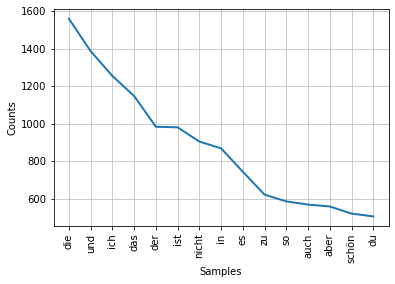

In [31]:
fd.plot(15)

Für unsere Stimmungsanalyse scheinen Artikel und Pronomen leider nicht hilfreich zu sein. Daher wollen wir sie als kontextlose Wörter entfernen. Diese werden auch als Stoppwörter, also Wörter, die den Lesefluss stören, bezeichnet. 

Wir überführen die in `stop_words.txt` enthaltenen Stoppwörter in eine List namens `stop_words`.

In [32]:
stop_words = pd.read_csv('./data/vocab/stop_words.txt', names=['Wort'])
stop_words.head()

,Wort
0,der
1,die
2,das
3,ein
4,eine


Wie viel Prozent unseres Datensatzes würden wir wohl verlieren, wenn wir die Stopp-Wörter entfernen?

In [33]:
def content_loss(text):
    content = [word for word in text if word not in stop_words['Wort'].values.tolist()]
    return 1.0 - len(content) / len(text)

In [34]:
content_loss(all_words)

0.1650552733791455

Dann werfen wir den Filter mal an.

In [35]:
def filter_tokens(tweets):
    """Filter tokens in tweets"""
    
    row_list = []
    for row in tweets:
        token_list = []
        for token in row:
            if token.lower() not in stop_words['Wort'].values.tolist():
                token_list.append(token.lower())
        row_list.append(token_list)
    
    return pd.Series(row_list)

In [36]:
tweets = filter_tokens(tweets) # Python list
tweets.head()

0    [artelle, diese, nächte, wo, man, bis, um, uhr...
1                       [astefanibays, abner, e, sthe]
2               [durstigewaemby, war, schön, mit, dir]
3       [niemand, hat, a, ahnung, jeder, weiß, besser]
4                      [xxskillerxx, z, u, s, p, ä, t]
dtype: object

Damit muss unsere Sammlung von Wörtern aktualisiert werden. Der Einfachheit halber sammeln wir sie erneut über die `aggregate_words()` Funktion.

In [37]:
all_words = aggregate_words(tweets)

Welche Ausgabe kann bei erneutem Aufruf der `content_loss()` Funktion erwartet werden?

In [38]:
texte_lm.show_task(8)

In [39]:
content_loss(all_words)

0.0

Wie sehen jetzt wo keine Stoppwörter mehr enthalten sind die häufigsten Wörter aus? Alternativ zur bereits bekannten Häufigkeitsverteilung lassen sich Schlagwortwolken aus den Wörtern erstellen. Dazu nutzen wir die [WordCloud](http://amueller.github.io/word_cloud/index.html) Funktionalität wie folgt.

In [40]:
from wordcloud import WordCloud
wc = WordCloud()

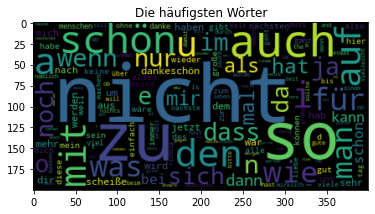

In [41]:
plt.imshow(wc.generate_from_frequencies(FreqDist(all_words)), interpolation="bilinear")
plt.title('Die häufigsten Wörter')
plt.show()

#### 2.3.3 <a id='tweets-bereinigen'>Tweets bereinigen</a>

Da uns der vergangene Abschnitt einige Wörter gekostet hat, wollen wir nun die Tweets identifizieren, die zu wenig oder vielleicht sogar zu viele Wörter enthalten. Beide Extrema sind für die weiterführende Analyse nicht zu gebrauchen. Daher berechnen wir im folgenden die Länge eines Tweets. Wie viele Wörter besitzt der kürzeste Tweet?

In [42]:
texte_lm.show_task(9)

In [43]:
tweets_length = [len(tweet) for tweet in tweets]
np.min(tweets_length)

1

Hoffentlich handelt es sich um einen Ausreißer. Das verifizieren wir wiederum mit einer Häufigkeitsverteilung. Dieses Mal aber als einfaches Histogramm über die `plot_tweet_length_distribution()` Funktion:

In [44]:
def plot_tweet_length_distribution(tweets_length):
    """Count tokens per tweet and plot their length distribution."""

    plt.hist(tweets_length, np.max(tweets_length))
    plt.xlabel('Words per tweet')
    plt.ylabel('Amount of tweets')
    plt.title('Tweet length distribution')
    plt.show()

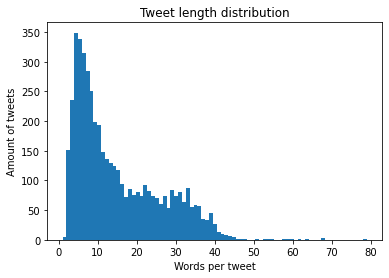

In [45]:
plot_tweet_length_distribution(tweets_length)

Wir verwerfen alle Tweets, die weniger als _5_ Wörter besitzen.

In [46]:
def drop_tweets(tweets):
    """Drop tweets"""
    
    row_list = []
    for row in tweets:
        if len(row) > 4:
            row_list.append(row)
    
    return pd.Series(row_list)

In [47]:
# tweets = drop_tweets(tweets) # Does not preserve index
tweets = tweets[tweets.map(len) > 4 ] # Preserve index

Von den anfänglich 10.000 Tweets bleibt gut 1/3 übrig.

In [48]:
tweets.size

3986

Weiter geht's in der Modelldomäne...

## 3. <a id='modell'>Modell</a>

In der Modelldomäne betten wir die bereinigten Daten zunächst auf Basis eines Vokabulars in ein Modell ein. Das Vokabular dient dabei als Look-up (LUT) für einen Tweet.

### 3.1 <a id='einbetten'>Textdaten einbetten</a>

Da Modelle vorzugsweise numerische Daten verstehen werden wir unsere Textdaten in diesem Abschnitt in eine für das Modell lesbare Form überführen und sie so in das Modell einbetten.

#### 3.1.1 <a id='vokabular'>Vokabular</a>

Das Vokabular besteht aus negativ bzw. positiv konnotierten Wörtern der deutschen Sprache. Die Schwere der Stimmung ist im Intervall von `[-1, 1]` bzw. `['negativ', 'positiv']` festgelegt, wonach neutrale Wörter, wie _und_ bzw. _oder_ mit eine Stimmungswert von _0_ gleichzusetzen sind.

In [49]:
labels = ['negativ', 'positiv']

Dann schauen wir uns mal die negativen...

In [50]:
negative = pd.read_csv('./data/vocab/negative_words.txt', lineterminator='\n', sep='\t', header=0, names=['Wort', 'Wert', 'Deklination'])
negative['Stimmung'] = 'negativ'
negative.head()

,Wort,Wert,Deklination,Stimmung
0,Abbruch|NN,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",negativ
1,Abdankung|NN,-0.0048,Abdankungen,negativ
2,Abdämpfung|NN,-0.0048,Abdämpfungen,negativ
3,Abfall|NN,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen",negativ
4,Abfuhr|NN,-0.3367,Abfuhren,negativ


...und die positiven Wörter an:

In [51]:
positive = pd.read_csv('./data/vocab/positive_words.txt', lineterminator='\n', sep='\t', header=0, names=['Wort', 'Wert', 'Deklination'])
positive['Stimmung'] = 'positiv'
positive.head()

,Wort,Wert,Deklination,Stimmung
0,Abschluß|NN,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",positiv
1,Abstimmung|NN,0.004,Abstimmungen,positiv
2,Agilität|NN,0.004,NaN,positiv
3,Aktivität|NN,0.004,Aktivitäten,positiv
4,Aktualisierung|NN,0.004,Aktualisierungen,positiv


Der Spalte _Wort_ scheint der Typ des Wortes angehängt zu sein. Wir führen das negative und das positive Vokabular im DataFrame `vocab` zusammen und trennen das Wort von seinem Typ.

In [52]:
vocab = pd.concat([negative, positive]) # assert positive.size + negative.size == vocab.size
vocab[['Wort', 'Typ']] = vocab['Wort'].str.split('|', 1, expand=True)
vocab.head()

,Wort,Wert,Deklination,Stimmung,Typ
0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",negativ,NN
1,Abdankung,-0.0048,Abdankungen,negativ,NN
2,Abdämpfung,-0.0048,Abdämpfungen,negativ,NN
3,Abfall,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen",negativ,NN
4,Abfuhr,-0.3367,Abfuhren,negativ,NN


Welche Wort-Typen sind vorhanden?

In [53]:
texte_lm.show_task(10)

In [54]:
vocab['Typ'].unique()

array(['NN', 'VVINF', 'ADJX', 'ADV'], dtype=object)

Wir visualisieren alle negativen Nomen mithilfe der bereits bekannten Schlagwortwolke:

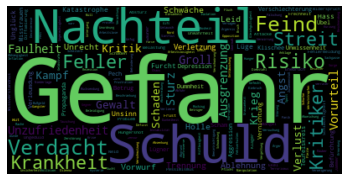

In [55]:
neg = vocab[(vocab['Stimmung'] == 'negativ') & (vocab['Typ'] == 'NN')] # Only negative vocabulary
plt.imshow(wc.generate_from_frequencies(pd.Series(neg.Wert.values * (-100), index=neg.Wort).to_dict()), interpolation="bilinear")
plt.axis('off')
plt.show()

Analog visualisieren wir alle positiven Adjektive in unserem Vokabular.

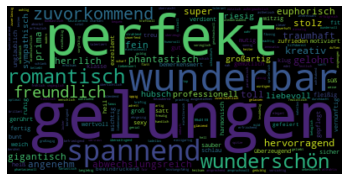

In [56]:
pos = vocab[(vocab['Stimmung'] == 'positiv') & (vocab['Typ'] == 'ADJX')] # Only positive vocabulary
plt.imshow(wc.generate_from_frequencies(pd.Series(pos.Wert.values * (100), index=pos.Wort).to_dict()), interpolation="bilinear")
plt.axis('off')
plt.show()

Ist unser Vokabular eher negativ oder eher positiv?

In [57]:
texte_lm.show_task(11)

In [58]:
vocab.mean()

Wert   -0.053921
dtype: float64

Wie bereits für die Tweets halten wir nach fehlenden Werten Ausschau. In welcher Spalte fehlen Werte?

In [59]:
texte_lm.show_task(12)

In [60]:
vocab.isna().describe()

,Wort,Wert,Deklination,Stimmung,Typ
count,3466,3466,3466,3466,3466
unique,1,1,2,1,1
top,False,False,False,False,False
freq,3466,3466,2659,3466,3466


Anstatt sie zu streichen, werden sie dieses mal mit einer leeren Zeichenkette ersetzt.

In [61]:
vocab = vocab.fillna('')

Für eine unkomplizierte LUT benötigen wir ein Wort pro Zeile. Dies erreichen wir, indem wir die Elemente der Liste in Spalte _Deklinaton_ in eine eigene Reihe überführen.

In [62]:
vocab['Merged'] = vocab['Wort'] + ',' + vocab['Deklination']
vocab['Merged'] = vocab['Merged'].str.split(',')
vocab = vocab.explode('Merged')
vocab = vocab.sort_values('Wort').reset_index(drop=True)
vocab = vocab.rename(columns={'Wort': 'Stamm', 'Merged': 'Wort'})
vocab = vocab.drop(['Deklination'], axis=1)
vocab

,Stamm,Wert,Stimmung,Typ,Wort
0,Abbruch,-0.0048,negativ,NN,Abbruch
1,Abbruch,-0.0048,negativ,NN,Abbruches
2,Abbruch,-0.0048,negativ,NN,Abbrüche
3,Abbruch,-0.0048,negativ,NN,Abbruchs
4,Abbruch,-0.0048,negativ,NN,Abbrüchen
...,...,...,...,...,...
32076,üppig,0.2010,positiv,ADJX,üppigster
32077,üppig,0.2010,positiv,ADJX,üppiges
32078,üppig,0.2010,positiv,ADJX,üppig
32079,üppig,0.2010,positiv,ADJX,üppigsten


Welchen Stimmungswert besitzt das Adjektiv _gut_ im Vokabular.

In [63]:
texte_lm.show_task(13)

In [64]:
vocab.loc[(vocab['Typ'] == 'ADJX') & (vocab['Wort'] == 'gut')]

,Stamm,Wert,Stimmung,Typ,Wort
13862,gut,0.3716,positiv,ADJX,gut


Wie lautet das "schlechteste" Wort im Vokabular?

In [65]:
texte_lm.show_task(14)

In [66]:
vocab.sort_values('Wert').head(3)

,Stamm,Wert,Stimmung,Typ,Wort
1096,Gefahr,-1.0000,negativ,NN,Gefahr
1097,Gefahr,-1.0000,negativ,NN,Gefahren
2219,Schuld,-0.9686,negativ,NN,Schulden


#### 3.1.2 <a id='vectorization'>Vektorisierung</a>

Innerhalb der Vektorisierung überführen wir die symbolischen Textdaten in numerische Werte. Dies geschieht im Normalfall über Häufigkeitsverteilungen. Je öfter ein Wort im Text vorkommt, desto wichtiger scheint es zu sein, was sich in der Vektorisierung wiederspiegelt.

In diesem Fall aber benutzen wir das bekannte Vokabular und überführen jedes einzelne Wort eines Tweets in seinen Stimmungswert. Das Wort _gut_ kriegt dabei den Stimmungswert 0.37 zugewiesen, wie eine vorherige Aufgabe bereits abgefragt hat.

In [67]:
vocab.loc[vocab['Wort'] == 'gut'].Wert

13862    0.3716
Name: Wert, dtype: float64

In [68]:
def vectorize(tweet):
    """Vectorize tweets based on vocabulary"""
            
    vectors = []
    for token in tweet:          
        row = vocab.loc[vocab['Wort'].str.lower() == token]
        if len(row) == 1:
            vectors.append(row.Wert.values[0])

    return vectors

In [69]:
tweets = tweets.to_frame(name='Token')
tweets['Vector'] = tweets['Token'].apply(vectorize)
tweets.head()

,Token,Vector
0,"[artelle, diese, nächte, wo, man, bis, um, uhr...",[]
2,"[durstigewaemby, war, schön, mit, dir]",[0.0081]
3,"[niemand, hat, a, ahnung, jeder, weiß, besser]",[0.004]
4,"[xxskillerxx, z, u, s, p, ä, t]",[]
5,"[jacjarian, i, f, sp, werden, eigenen, geldver...",[-0.1953]


Leider ist der Funktionsaufruf nicht optimiert...

![Time](https://media.giphy.com/media/tXL4FHPSnVJ0A/giphy.gif)

#### 3.1.2 <a id='label'>Label</a>

Dieser Schritt fügt den Tweets eine Stimmung auf Basis des Vokabulars hinzu. Dabei summieren wir die jeweiligen Stimmungswerte aller im Tweet enthaltenen Wörter und schauen ob sie in Summe negativ oder positiv sind.

In [70]:
def get_labels(tweet):
    """Label tweets according to vocabulary."""
    
    score = np.sum(tweet)
            
    if score > 0.0:
        return 'positiv'
    elif score < 0.0:
        return 'negativ'
    else:
        return 'neutral'

In [71]:
tweets['Label'] = tweets['Vector'].apply(get_labels)
tweets.head()

,Token,Vector,Label
0,"[artelle, diese, nächte, wo, man, bis, um, uhr...",[],neutral
2,"[durstigewaemby, war, schön, mit, dir]",[0.0081],positiv
3,"[niemand, hat, a, ahnung, jeder, weiß, besser]",[0.004],positiv
4,"[xxskillerxx, z, u, s, p, ä, t]",[],neutral
5,"[jacjarian, i, f, sp, werden, eigenen, geldver...",[-0.1953],negativ


Welches Label bekommen Tweets, dessen Summe _0_ ist, weil entweder keine Wörter gefunden werden bzw. sich die Stimmungswerte neutralisieren?

In [72]:
texte_lm.show_task(15)

Neutrale Tweets sind für unser Modell nicht relevant und werden verworfen.

In [73]:
tweets = tweets.drop(tweets[tweets['Label'] == 'neutral'].index) # Preserve index
tweets.head()

,Token,Vector,Label
2,"[durstigewaemby, war, schön, mit, dir]",[0.0081],positiv
3,"[niemand, hat, a, ahnung, jeder, weiß, besser]",[0.004],positiv
5,"[jacjarian, i, f, sp, werden, eigenen, geldver...",[-0.1953],negativ
6,"[goia, corona, scherze, viel, wichtiger, frage...",[0.3822],positiv
7,"[senadlacevic, panzerschoko, lukashammer, frau...","[-0.7618, 0.004]",negativ


Wie sieht die Verteilung zwischen negativen und positiven Tweets aus? Ist die Stimmungslage eher negativ oder eher positiv?

In [74]:
texte_lm.show_task(16)

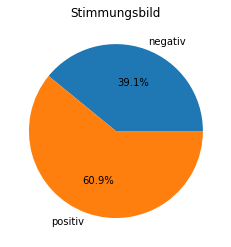

In [75]:
plt.pie([tweets['Label'][tweets['Label'] == 'negativ'].count(), tweets['Label'][tweets['Label'] == 'positiv'].count()], labels=labels, autopct='%1.1f%%')
plt.title('Stimmungsbild')
plt.show()

Natürlich werden nicht immer gleich viele Wörter pro Tweet im Vokabular gefunden. Da unser Modell eine konstante Eingabe benötigt, müssen wir uns auf eine Wortzahl einigen, die vom Modell pro Tweet einbezogen wird. Naheliegend entscheiden wir uns für die im Mittel gefundenen Wörter als `pad_size`...

In [76]:
pad_size = int(np.round(np.mean([len(vector) for vector in tweets['Vector']])))
pad_size

2

...und füllen fehlende Werte mit der `padding()` Funktion wie folgt auf.

In [77]:
def padding(tweet):
    """Pad vectors with zeros at the end."""
       
    return np.pad(tweet[:pad_size], (0, pad_size-len(tweet[:pad_size])))

#### 3.1.4 <a id='features'>Features</a>

In [78]:
def get_features(words):
    return dict([(word, True) for word in words])

In [79]:
negative_features = [(get_features(vocab.loc[vocab['Stimmung'] == 'negativ']['Wort']), 'negativ')]
positive_features = [(get_features(vocab.loc[vocab['Stimmung'] == 'positiv']['Wort']), 'positiv')]
train_set = negative_features + positive_features

### 3.2 <a id='klassifizieren'>Textdaten klassifizieren</a>

#### 3.2.1 <a id='überwachte-klassifikation'>Überwachte Klassifizierung</a>

Mithilfe des [Naive Bayes](https://www.nltk.org/_modules/nltk/classify/naivebayes.html) Algorithmus führen wir eine überwachte Klassifizierung aus.

In [80]:
from nltk import NaiveBayesClassifier

In [81]:
classifier = NaiveBayesClassifier.train(train_set)

In [82]:
def supervised_classifier(tweets):
    """Supervised classifier"""
    
    print('#\tSoll\tIst\t∆\tTweet')
    
    negative = 0
    positive = 0
    error = 0
    for tweet in tweets.itertuples():
        
        label = tweet.Label
        features = get_features(tweet.Token)
        prediction = classifier.classify(features)
            
        if label != prediction: 
            delta = 'X'
            error += 1
        else: 
            delta = ' '
        
        if prediction == 'negativ':
            negative += 1
            
        else:
            positive += 1
            
        print('%i\t%s\t%s\t%s\t%.140s' % (tweet.Index, label, prediction, delta, tweets_copy.iloc[tweet.Index].replace('\n', '')))
        
    print('\nGenauigkeit:', 1 - error / tweets.shape[0])
    plt.pie([negative, positive], labels=labels, autopct='%1.1f%%')
    plt.title('Überwachte Klassifizierung')

#	Soll	Ist	∆	Tweet
4139	positiv	positiv	 	@gabygh13 Einfach ignorieren, da unmaßgeblich u. ich hätte auch starke Zweifel an seiner Bio. Pass auf dich auf, Gaby.
1480	positiv	positiv	 	Erst in einem Video zur Shoperöffnung erklärt Meritt, dass dies eine Bezeichnung der Communities ist, innerhalb derer diese hergestellt werd
4401	negativ	positiv	X	@berdiberdus @ZDFheute Ich denke er hat einfach einen genialen Plan, solange die Welt sich für dumm verkaufen lässt ist er auf der Siegerstr
4666	positiv	positiv	 	@mamigration EIN Buch gibt es so gar nicht.Ich bin ein riesiger Fan der Black Dagger Brotherhood von J.R.Ward, den dark Carpathians von Chri
4444	positiv	positiv	 	@welt a bankkaufmännle und ex langzeitstudent (14jahre) und einer der es nur zum erste staatsexamen schaffte - top elite in unserem land!
1539	positiv	positiv	 	@anx__01 @kevstarstyle Nicht "wirklich" wirklich. Es gibt Nicht-Weiße die rassistisch sind, aber richtigen Rassismus gegen Weiße in ernst zu
4610	negativ	positiv	X

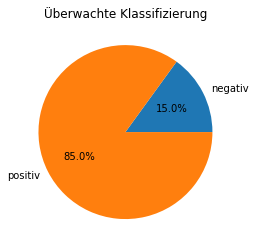

In [97]:
supervised_classifier(tweets.sample(20))

#### 3.2.2 <a id='unüberwachte-klassifikation'>Unüberwachte Klassifizierung</a>

Mithilfe von [K-means](https://www.nltk.org/_modules/nltk/cluster/kmeans.html) Clustering führen wir eine unüberwachte Klassifizierung aus.

In [84]:
from nltk.cluster import KMeansClusterer, euclidean_distance

In [85]:
clusterer = KMeansClusterer(2, euclidean_distance, repeats=10, avoid_empty_clusters=True)

In [86]:
clusters = clusterer.cluster(tweets['Vector'].apply(padding), True)

Wo liegen die Mittelpunkte unserer Cluster?

In [87]:
def plot_clusters():
    """Plot clusters"""
    
    means = clusterer.means()
    plt.scatter(means[0], means[0])
    plt.scatter(means[1], means[1])
    plt.legend(['Negativ', 'Positiv'])

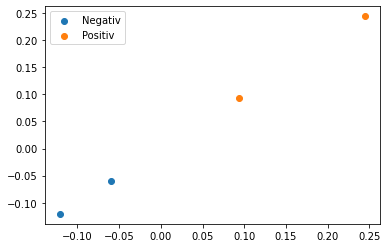

In [88]:
plot_clusters()

In [89]:
def unsupervised_classifier(tweets):
    """Unsupervised classifier"""
    
    print('#\tSoll\tIst\t∆\tTweet')
    
    negative = 0
    positive = 0
    error = 0
    for tweet in tweets.itertuples():
        
        label = tweet.Label
        vector = padding(tweet.Vector)
        prediction = clusterer.classify(vector)
        
        if prediction == 0: 
            cluster = 'negativ'
            negative += 1
            
        else:
            cluster = 'positiv'
            positive += 1
            
        if label != cluster: 
            delta = 'X'
            error += 1
            
        else: delta = ' '
            
        print('%i\t%s\t%s\t%s\t%.140s' % (tweet.Index, label, cluster, delta, tweets_copy.iloc[tweet.Index].replace('\n', '')))
   
    print('\nGenauigkeit:', 1 - error / tweets.shape[0])
    plt.pie([negative, positive], labels=['negativ', 'positiv'], autopct='%1.1f%%')
    plt.title('Unüberwachte Klassifizierung')

#	Soll	Ist	∆	Tweet
1813	positiv	negativ	X	@retardcapsuless Wie schön kann ein Mensch aussehen omg
2635	positiv	positiv	 	@laenguyn Ouip danke schön belgo
4715	negativ	negativ	 	@bigben82 @Kizito5 Wenn dem so wäre, wäre meine Mutti begabter als all die Vollpfosten, die ihr zu schützen versucht. ;) Dummes Papavolk, da
2161	positiv	positiv	 	@ridingwith11 Ich danke dir von ganzem Herzen und wünsche dir und deiner Familie alles Liebe ⚘🙏⚘Viele liebe Grüße Emma ⚘ https://t.co/oa39Nl
4704	positiv	negativ	X	@user82de @ClemensAugust2 @Bartzissey @waldenmonk Nö. Das ist nicht die "richtige Grundannahme"  zu Corona, sondern der Effekt / die Auswirk
1200	negativ	negativ	 	@Zora_211212 A) Ein infizierter ohne Maske husted Dich an - &gt; Völlig egal ob Du eine Maske trägst oder nicht. Hohes Infektionsrisiko.B) I
2323	negativ	positiv	X	@IngeHannemann @hubertus_heil Es ist im Prinzip e.neoliberaler Kreislauf im Sinne weiterer #Deklassierung einer #Menschengruppe innerhalb un
996	negativ	negativ	 	@Jut

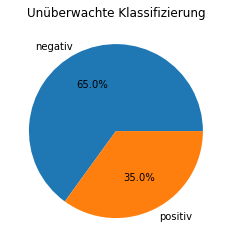

In [100]:
unsupervised_classifier(tweets.sample(20))

<div style="background-color: #150458; padding: 5px;"></div>

## 4. <a id='verwendung'>Verwendung</a>

In [91]:
negative = "Was für ein schlechtes Lernmodul"
positive = "Was für ein gutes Lernmodul"

In [92]:
def unsupervised_classification(sentence):
    """Helper function for unsupervised classification"""
    
    vector = padding(vectorize(sentence))
    prediction = clusterer.classify(vector)
    
    if prediction == 0: print('negativ')            
    else: print('positiv')

### 4.1 Überwachter Klassifikator

Welche Stimmung gibt er für folgenden Satz aus?

> Was für ein schlechtes Lernmodul

In [93]:
classifier.classify(get_features(negative.split()))

'negativ'

Welche Stimmung gibt er für folgenden Satz aus?

> Was für ein gutes Lernmodul

In [94]:
classifier.classify(get_features(positive.split()))

'positiv'

### 4.2 Unüberwachter Klassifikator

Welche Stimmung gibt er für folgenden Satz aus?

> Was für ein schlechtes Lernmodul

In [95]:
unsupervised_classification(negative.split())

negativ


Welche Stimmung gibt er für folgenden Satz aus?

> Was für ein gutes Lernmodul

In [96]:
unsupervised_classification(positive.split())

positiv


<div style="background-color: #150458; padding: 5px;"></div>

## 5. <a id='abschluss'>Abschluss</a>

**Anhang:**

![Pipeline](./img/pipeline.png)

**Weiterführendes:**

2. Daten
3. Modell
    1. Daten einbetten
        * [Word2Vec](https://en.wikipedia.org/wiki/Word2vec)
4. Verwendung